In [1]:
import pandas as pd
from dateutil import tz
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

df: pd.DataFrame = pd.read_csv('weatherHistory.csv')

print(df.info())
print('\n')
print(df.isna().sum())

def draw_heat_map(corr_matrix: pd.DataFrame) -> None:
    sns.heatmap(data=corr_matrix, cmap='coolwarm', annot=True, annot_kws={"fontsize": 5.5})

def draw_hist(data: pd.DataFrame, bins: int = 100) -> None:
    plt.hist(data, bins=bins)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None


Formatted Date                0
Summary                       

In [2]:
print(df['Formatted Date'].value_counts(dropna=False))

Formatted Date
2010-08-02 01:00:00.000 +0200    2
2010-08-02 02:00:00.000 +0200    2
2010-08-02 03:00:00.000 +0200    2
2010-08-02 04:00:00.000 +0200    2
2010-08-02 05:00:00.000 +0200    2
                                ..
2009-03-09 19:00:00.000 +0100    1
2009-03-09 18:00:00.000 +0100    1
2009-03-09 17:00:00.000 +0100    1
2009-03-09 16:00:00.000 +0100    1
2009-05-01 03:00:00.000 +0200    1
Name: count, Length: 96429, dtype: int64


In [3]:
to_zone: tz.tzlocal = tz.tzlocal()
dates: pd.Series = df['Formatted Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f %z").astimezone(tz=to_zone))
df.drop(['Formatted Date'], axis=1, inplace=True)
df['Year'] = dates.dt.year
df['Month'] = dates.dt.month
df['Day'] = dates.dt.day
df['Weekday'] = dates.dt.weekday
df['Hour'] = dates.dt.hour

In [4]:
print(df['Summary'].value_counts(dropna=False))

Summary
Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

In [5]:
print(df['Daily Summary'].value_counts())

Daily Summary
Mostly cloudy throughout the day.                                                            20085
Partly cloudy throughout the day.                                                             9981
Partly cloudy until night.                                                                    6169
Partly cloudy starting in the morning.                                                        5184
Foggy in the morning.                                                                         4201
                                                                                             ...  
Mostly cloudy until night and breezy starting in the evening continuing until night.            24
Mostly cloudy starting in the morning continuing until night and breezy in the afternoon.       24
Mostly cloudy starting in the morning and breezy in the evening.                                24
Breezy starting in the morning continuing until night.                                         

In [6]:
df.drop('Summary', axis=1, inplace=True)
df.drop('Daily Summary', axis=1, inplace=True)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               95936 non-null  object 
 1   Temperature (C)           96453 non-null  float64
 2   Apparent Temperature (C)  96453 non-null  float64
 3   Humidity                  96453 non-null  float64
 4   Wind Speed (km/h)         96453 non-null  float64
 5   Wind Bearing (degrees)    96453 non-null  float64
 6   Visibility (km)           96453 non-null  float64
 7   Loud Cover                96453 non-null  float64
 8   Pressure (millibars)      96453 non-null  float64
 9   Year                      96453 non-null  int32  
 10  Month                     96453 non-null  int32  
 11  Day                       96453 non-null  int32  
 12  Weekday                   96453 non-null  int32  
 13  Hour                      96453 non-null  int32  
dtypes: flo

In [8]:
print(df['Precip Type'].value_counts(dropna=False))

Precip Type
rain    85224
snow    10712
NaN       517
Name: count, dtype: int64


In [9]:
df['Rain'] = df['Precip Type'].apply(lambda x: float(x == 'rain'))
df['Snow'] = df['Precip Type'].apply(lambda x: float(x == 'snow'))
df.drop(['Precip Type'], axis=1, inplace=True)

In [10]:
print(df['Loud Cover'].value_counts(dropna=False))

Loud Cover
0.0    96453
Name: count, dtype: int64


In [11]:
df.drop('Loud Cover', axis=1, inplace=True)

In [12]:
df['Pressure (millibars)'].value_counts().sort_index()

Pressure (millibars)
0.00       1288
973.78        1
974.52        1
974.78        1
975.12        1
           ... 
1045.90       1
1045.93       1
1046.06       1
1046.26       1
1046.38       1
Name: count, Length: 4979, dtype: int64

In [13]:
to_mean: pd.DataFrame = df['Pressure (millibars)'].replace(value=df['Pressure (millibars)'].mean(), to_replace=0.0)
to_median: pd.DataFrame = df['Pressure (millibars)'].replace(value=df['Pressure (millibars)'].median(), to_replace=0.0)

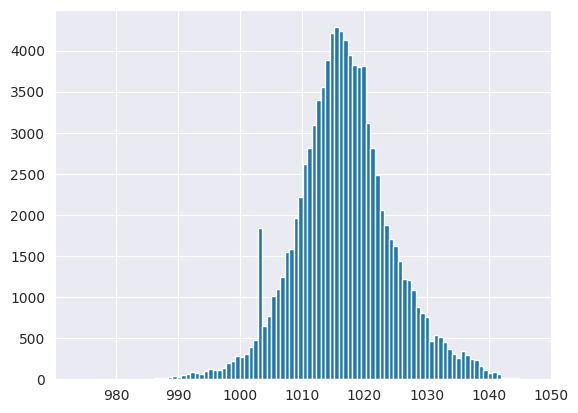

In [14]:
draw_hist(to_mean)

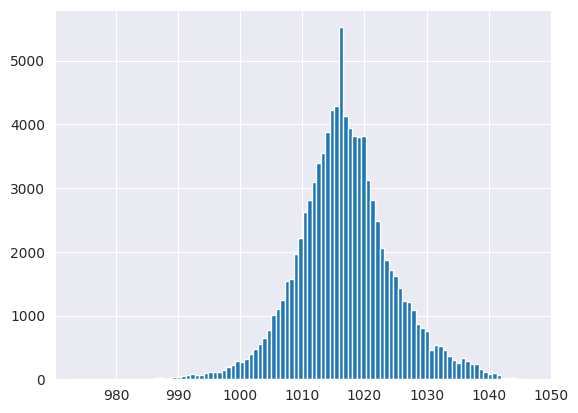

In [15]:
draw_hist(to_median)

In [16]:
df['Pressure (millibars)'] = to_median

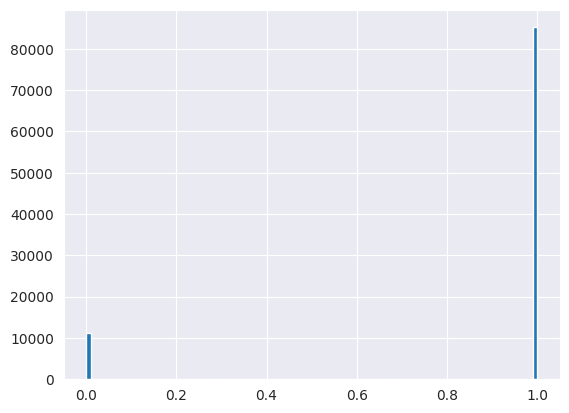

In [17]:
draw_hist(data=df['Rain'])

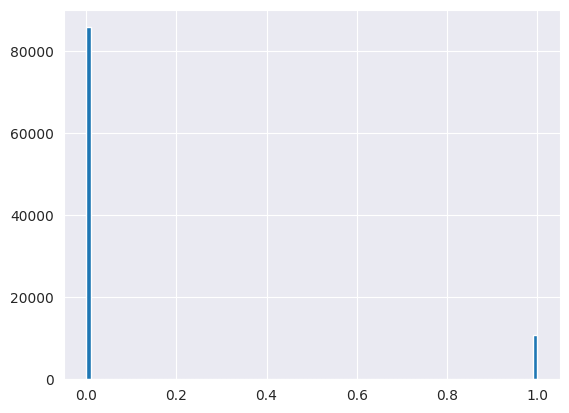

In [18]:
draw_hist(data=df['Snow'])

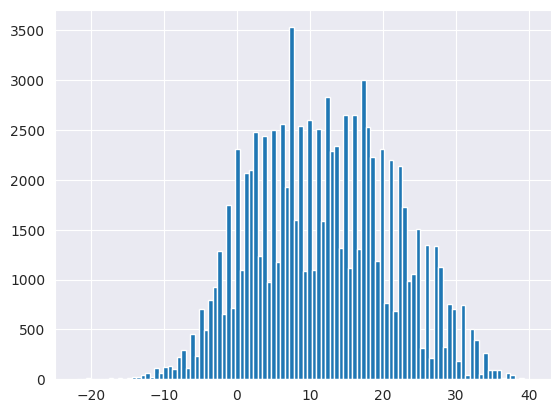

In [19]:
draw_hist(data=df['Temperature (C)'])

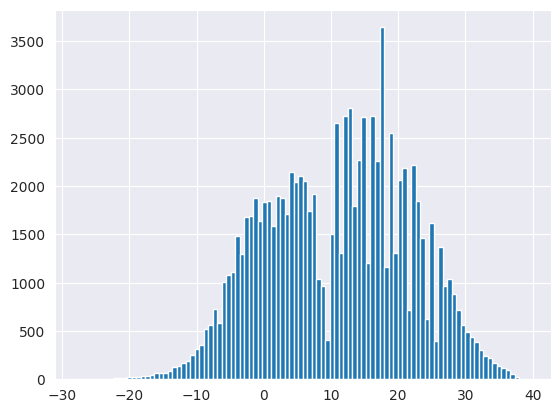

In [20]:
draw_hist(data=df['Apparent Temperature (C)'])

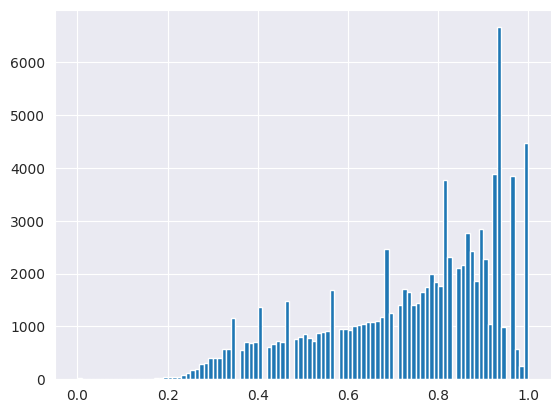

In [21]:
draw_hist(data=df['Humidity'])

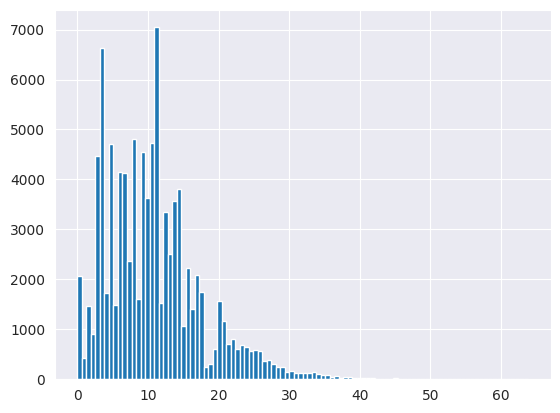

In [22]:
draw_hist(data=df['Wind Speed (km/h)'])

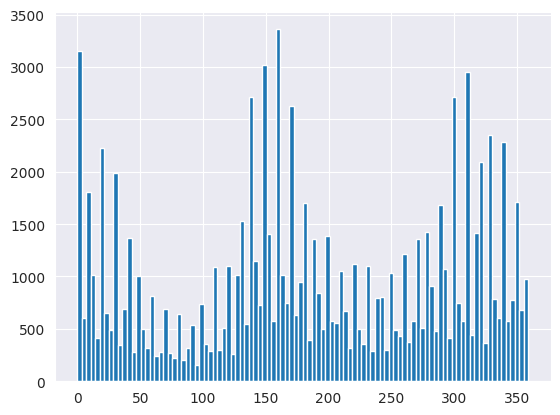

In [23]:
draw_hist(data=df['Wind Bearing (degrees)'])

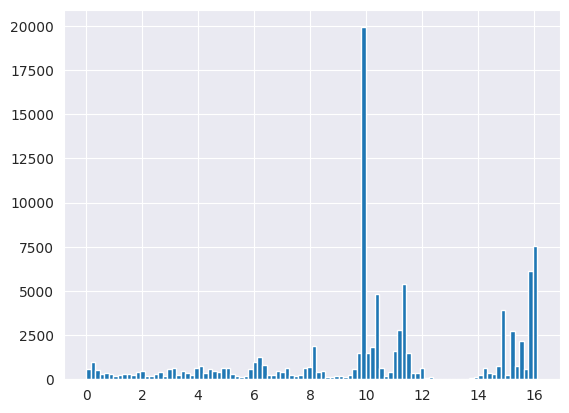

In [24]:
draw_hist(data=df['Visibility (km)'])

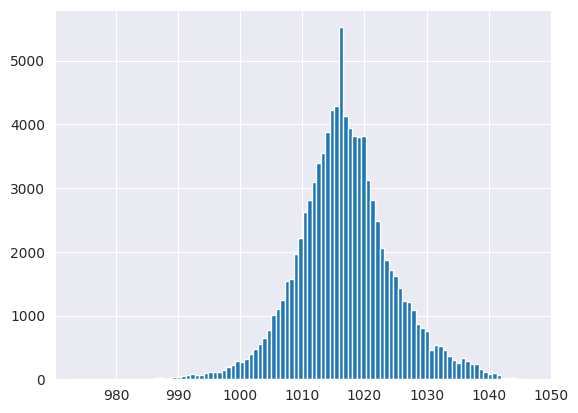

In [25]:
draw_hist(data=df['Pressure (millibars)'])

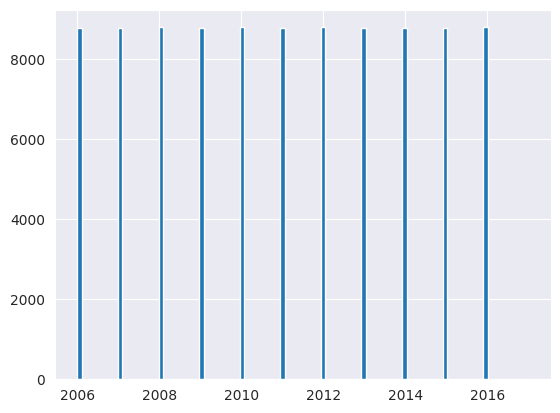

In [26]:
draw_hist(data=df['Year'])

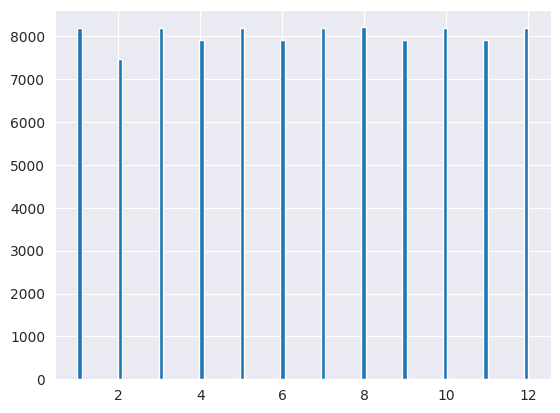

In [27]:
draw_hist(data=df['Month'])

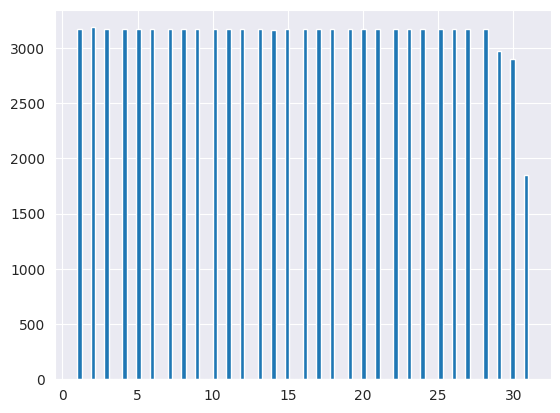

In [28]:
draw_hist(data=df['Day'])

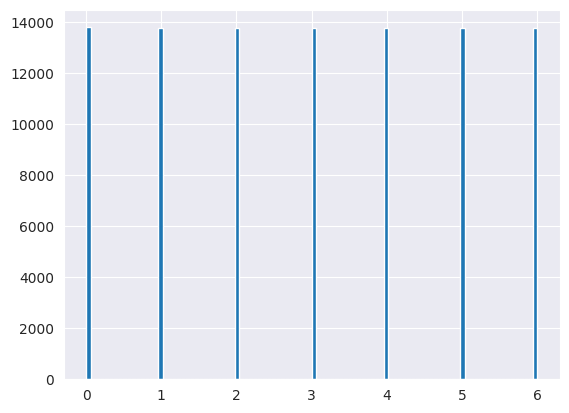

In [29]:
draw_hist(data=df['Weekday'])

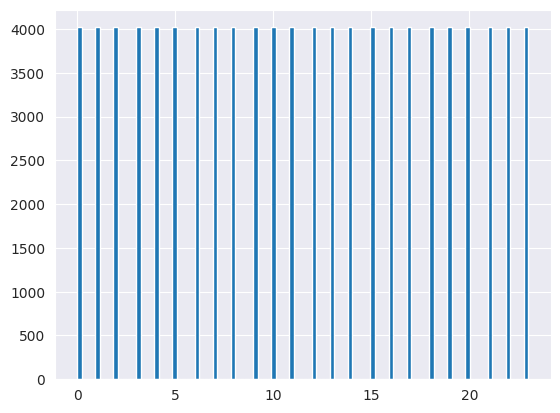

In [30]:
draw_hist(data=df['Hour'])

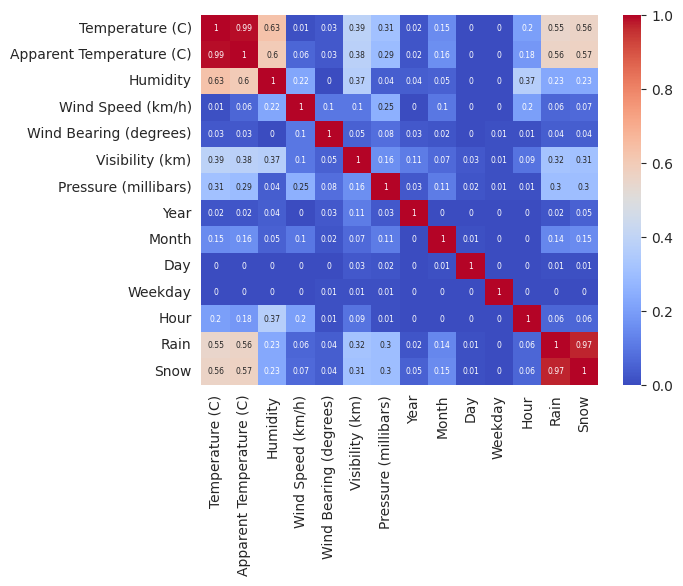

In [31]:
draw_heat_map(df.corr().abs().round(2))

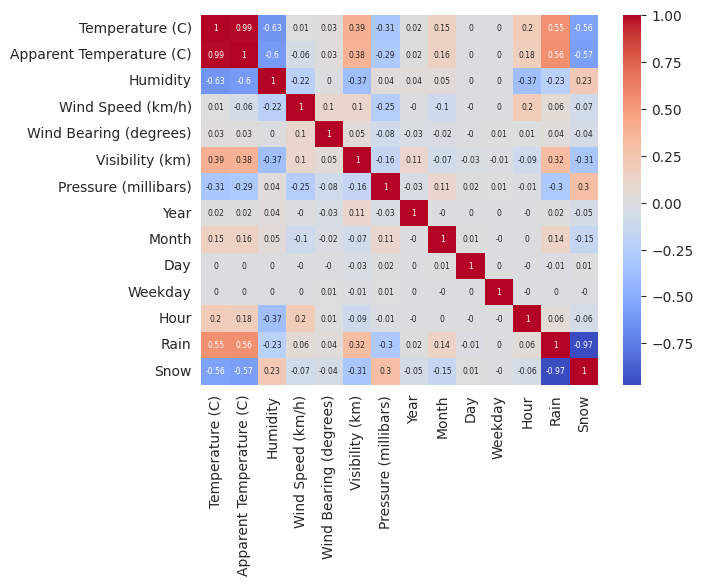

In [32]:
draw_heat_map(df.corr().round(2))

In [33]:
from typing import Dict
from math import log2

def calculate_gain_ratio(df: pd.DataFrame, target: str) -> Dict[str, float]:
    result: Dict[str, float] = {}

    target_entropy: float = calculate_entropy(df[target])

    for c in df:
        entropy_before: float = target_entropy
        entropy_after: float = calculate_child_entropy(df=df, target=target, feature=c)
        split_information: float = calculate_entropy(df[c])
        result[c] = (entropy_before - entropy_after) / split_information

    return result


def calculate_child_entropy(df: pd.DataFrame, target: str, feature: str) -> float:
    result: float = 0

    df_length = df.shape[0]

    for feature_value in df[feature].unique():
        tmp: pd.DataFrame = df[df[feature] == feature_value]
        p: float = tmp.shape[0] / df_length
        result += p * calculate_entropy(tmp[target])

    return result


def calculate_entropy(series: pd.Series) -> float:
    result: float = 0
    size: float = float(series.size)

    for it in series.unique():
        pi: float = series[series == it].shape[0] / size
        result -= pi * log2(pi)

    return result


In [34]:
from math import floor
import numpy as np

n: int = 1 + floor(log2(len(df)))
q: np.ndarray = np.linspace(start=0, stop=1, num=n)

cut_df: pd.DataFrame = pd.DataFrame()
cut_df['Rain'] = pd.cut(x=df['Rain'], bins=[0, 0.5, 1], include_lowest=True)
cut_df['Snow'] = pd.cut(x=df['Snow'], bins=[0, 0.5, 1], include_lowest=True)
cut_df['Year'] = pd.cut(x=df['Year'], bins=range(2005, 2018), include_lowest=False)
cut_df['Month'] = pd.cut(x=df['Month'], bins=range(0, 13), include_lowest=False)
cut_df['Day'] = pd.cut(x=df['Day'], bins=range(0, 32), include_lowest=False)
cut_df['Weekday'] = pd.cut(x=df['Weekday'], bins=range(-1, 7), include_lowest=False)
cut_df['Hour'] = pd.cut(x=df['Hour'], bins=range(-1, 24), include_lowest=False)
cut_df['Visibility (km)'] = pd.cut(x=df['Visibility (km)'], bins=[0, 9.5, 12, 17], include_lowest=True)

manually_cut: list[str] = ['Rain', 'Snow', 'Year', 'Month', 'Day', 'Weekday', 'Hour', 'Visibility (km)']

for c in df:
    if c not in manually_cut:
        cut_df[c] = pd.qcut(x=df[c], q=q)

In [35]:
def print_gain_ratio(df: pd.DataFrame, target: str) -> None:
    gain_ratio: Dict[str, float] = calculate_gain_ratio(df=df, target=target)

    print(target)
    for key, value in sorted(gain_ratio.items(), key=lambda x: x[1], reverse=True):
        print(f'\t{key}: {value}')
    print()


In [36]:
print_gain_ratio(cut_df, 'Temperature (C)')


Temperature (C)
	Temperature (C): 1.0
	Snow: 0.9044750200787101
	Apparent Temperature (C): 0.8227338562024027
	Rain: 0.8215930505914739
	Month: 0.2279872850198804
	Visibility (km): 0.14097023799942718
	Humidity: 0.11249930186917277
	Pressure (millibars): 0.047458019502445006
	Hour: 0.03020641975790197
	Wind Speed (km/h): 0.008115358096486348
	Year: 0.007889637758383417
	Wind Bearing (degrees): 0.00452600357277016
	Day: 0.0030443224068147047
	Weekday: 0.00043532617232311984


In [37]:
print_gain_ratio(cut_df, 'Apparent Temperature (C)')

Apparent Temperature (C)
	Apparent Temperature (C): 1.0
	Temperature (C): 0.8227394621186139
	Snow: 0.7674070630303247
	Rain: 0.6903651392364657
	Month: 0.23171016538151448
	Visibility (km): 0.132524309657344
	Humidity: 0.10550967441067348
	Pressure (millibars): 0.043346349034457686
	Hour: 0.02903964036588436
	Wind Speed (km/h): 0.008993161151599408
	Year: 0.0071525462049595815
	Wind Bearing (degrees): 0.004597536356359567
	Day: 0.002553206470553318
	Weekday: 0.0004041464421535295


In [38]:
# Humidity
# Rain
# Snow
# Visibility(?)

In [39]:
from sklearn.feature_selection import SelectKBest, f_regression

def select_best_k_features_sklearn(df: pd.DataFrame, k: int, target: str) -> pd.DataFrame:
    x: pd.DataFrame = df[[col for col in df.columns if col != target]]
    y: pd.DataFrame = df[target]
    reg = SelectKBest(k=k, score_func=f_regression).fit(X=x, y=y)
    return x[[val for i, val in enumerate(x.columns) if reg.get_support()[i]]]

In [40]:
best_k_features_df: pd.DataFrame = select_best_k_features_sklearn(df=df, k=5, target='Temperature (C)')
for column in best_k_features_df.columns:
    print(column)

Apparent Temperature (C)
Humidity
Visibility (km)
Rain
Snow
